In [2]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

# # Data inladen
df = pd.read_csv("final_df.csv")
print(df.head())
# df = groot_gemid_df

# Eerst de data opschudden om bias te voorkomen
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Zorg ervoor dat elke ervaring, geslacht en gewichtsklasse in elke set vertegenwoordigd zijn
train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

for ervaring in df['ervaring'].unique():
    for geslacht in df['binary_geslacht'].unique():
        for gewichtsklasse in df['binary_gewichtsklasse'].unique():
            subset = df[(df['ervaring'] == ervaring) & (df['binary_geslacht'] == geslacht) & (df['binary_gewichtsklasse'] == gewichtsklasse)]
            if not subset.empty:
                temp_train, temp_temp = train_test_split(subset, test_size=0.3, random_state=42)
                temp_val, temp_test = train_test_split(temp_temp, test_size=0.3, random_state=42)
                train_data = pd.concat([train_data, temp_train])
                val_data = pd.concat([val_data, temp_val])
                test_data = pd.concat([test_data, temp_test])

# Reset indexen
train_data.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Controleren op juiste verdeling
print(f"Trainingsdata: {len(train_data)} rijen")
print(f"Validatiedata: {len(val_data)} rijen")
print(f"Testdata: {len(test_data)} rijen")

# # Optioneel: data opslaan in aparte bestanden
# train_data.to_csv('train_data.csv', index=False)
# val_data.to_csv('val_data.csv', index=False)
# test_data.to_csv('test_data.csv', index=False)

print(df['2k tijd'].min())
print(df['2k tijd'].max())

   ervaring  500_split  2k tijd  binary_trainingtype  binary_geslacht  \
0         1      104.6    379.9                    0                0   
1         1      104.7    379.9                    0                0   
2         1      104.3    379.9                    0                0   
3         1      104.0    379.9                    0                0   
4         1      104.1    379.9                    0                0   

   binary_gewichtsklasse  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
Trainingsdata: 3018 rijen
Validatiedata: 905 rijen
Testdata: 391 rijen
371.8
510.1


In [7]:
X_train = train_data.drop(columns=['2k tijd'])
y_train = train_data['2k tijd']

X_val = val_data.drop(columns=['2k tijd'])
y_val = val_data['2k tijd']

X_test = test_data.drop(columns=['2k tijd'])
y_test = test_data['2k tijd']

# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on training data only
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Example prediction (Random Forest): [414.71087038]
mse_train_rf = 36.73849392258164
mse_val_rf = 63.89596661817212
mse_test_rf = 52.89365727251645
rse_test_rf = 7.272802573459316
train_r2_rf = 0.9646447887166948
val_r2_rf = 0.937537625368215
test_r2_rf = 0.9484927389516186
   Actual Values  Predicted Values (Random Forest)  Difference (Random Forest)
0          427.7                        419.442809                    8.257191
1          420.5                        427.128839                   -6.628839
2          418.6                        423.396286                   -4.796286
3          427.7                        426.553247                    1.146753
4          427.7                        424.550613                    3.149387
5          420.5                        426.349063                   -5.849063
6          421.9                        420.356782                    1.543218
7          449.0                        426.784173                   22.215827
8          431.

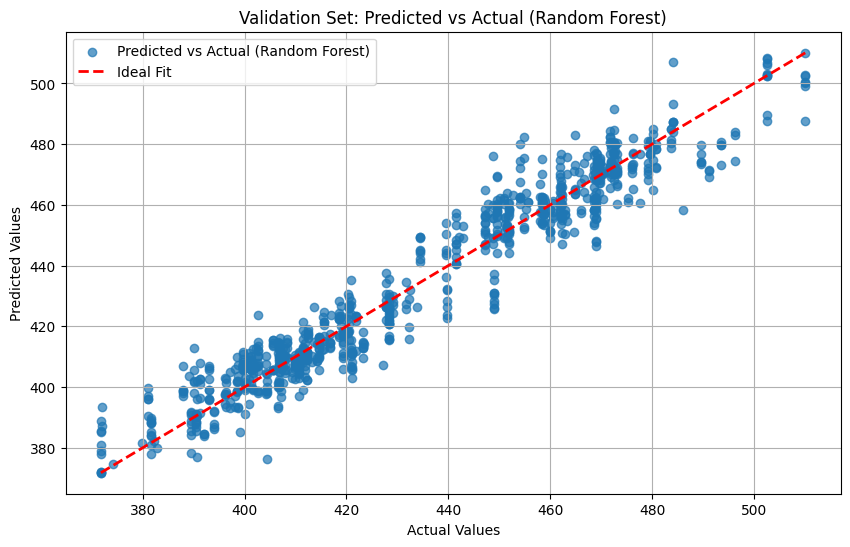

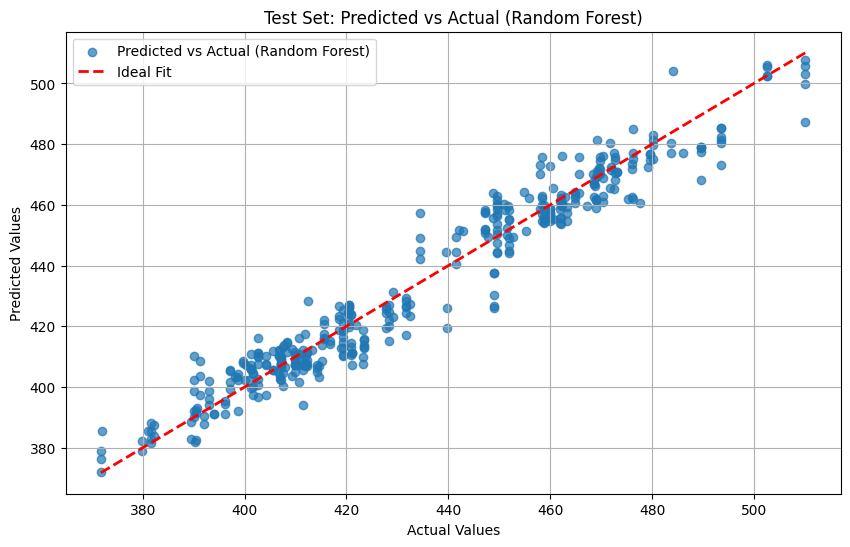

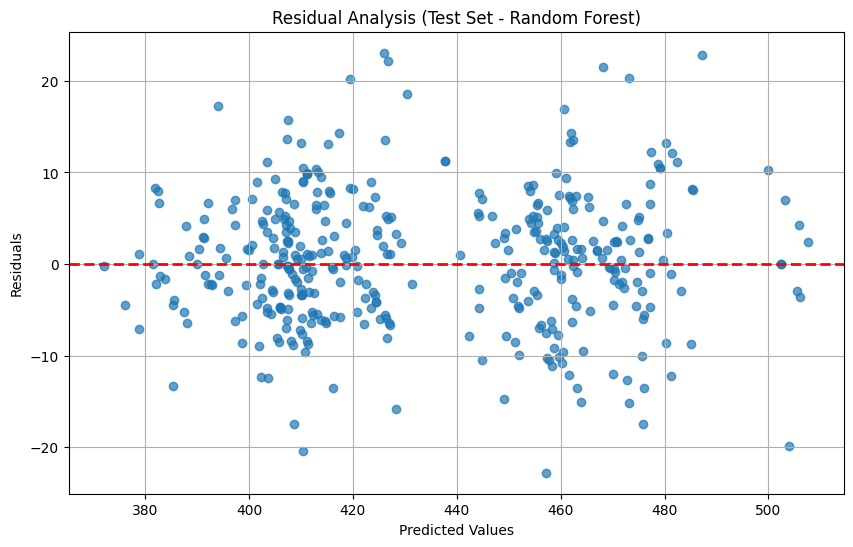

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rf_model = RandomForestRegressor(max_depth=10, random_state=0)
rf_model.fit(X_train_scaled, y_train)

train_pred_rf = rf_model.predict(X_train_scaled)
val_pred_rf = rf_model.predict(X_val_scaled)
test_pred_rf = rf_model.predict(X_test_scaled)

example_input = np.array([[1, 104.6, 0, 0, 1]])
example_prediction_rf = rf_model.predict(example_input)
print(f"Example prediction (Random Forest): {example_prediction_rf}")

mse_train_rf = mean_squared_error(y_train, train_pred_rf)
mse_val_rf = mean_squared_error(y_val, val_pred_rf)
mse_test_rf = mean_squared_error(y_test, test_pred_rf)
rse_test_rf = np.sqrt(mse_test_rf)

print(f"mse_train_rf = {mse_train_rf}")
print(f"mse_val_rf = {mse_val_rf}")
print(f"mse_test_rf = {mse_test_rf}")
print(f"rse_test_rf = {rse_test_rf}")

train_r2_rf = r2_score(y_train, train_pred_rf)
val_r2_rf = r2_score(y_val, val_pred_rf)
test_r2_rf = r2_score(y_test, test_pred_rf)

print(f"train_r2_rf = {train_r2_rf}")
print(f"val_r2_rf = {val_r2_rf}")
print(f"test_r2_rf = {test_r2_rf}")

results_rf = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values (Random Forest)': test_pred_rf,
    'Difference (Random Forest)': y_test - test_pred_rf
})
print(results_rf.head(10))

# Plot 1: Actual vs Predicted for Validation Set (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_pred_rf, alpha=0.7, label='Predicted vs Actual (Random Forest)')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Validation Set: Predicted vs Actual (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Actual vs Predicted for Test Set (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_pred_rf, alpha=0.7, label='Predicted vs Actual (Random Forest)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Set: Predicted vs Actual (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Residuals for Test Set (Random Forest)
residuals_rf = y_test - test_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(test_pred_rf, residuals_rf, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis (Test Set - Random Forest)')
plt.grid(True)
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

max_depths = range(1, 15)
validation_errors = []

for depth in max_depths:
    model = RandomForestRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    mse = mean_squared_error(y_val, predictions)
    validation_errors.append(mse)

best_depth = max_depths[validation_errors.index(min(validation_errors))]
print(f"Best max_depth: {best_depth}")


Best max_depth: 10
